In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 71.3 MB/s eta 0:00:00


In [ ]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
mydb=mysql.connector.connect(host="eia-scrap.c2xacwacu1dj.us-west-2.rds.amazonaws.com", user="admin",password="EIA2023*",database="sys")
mycursor=mydb.cursor(buffered=True,dictionary=True)
#parametro configruacion inicial
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36'}
html_get=requests.get("https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC",headers=headers).content
soup=BeautifulSoup(html_get,"lxml")
stock_name=soup.find_all("h1",class_="D(ib) Fz(18px)")[0].text
price_data=soup.find_all("tr",class_="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)")
for i in price_data:
  date=i.find_all("td")[0].find_all("span")[0].text
  open=i.find_all("td")[1].find_all("span")[0].text.replace(",","")
  high=i.find_all("td")[2].find_all("span")[0].text.replace(",","")
  low=i.find_all("td")[3].find_all("span")[0].text.replace(",","")
  close=i.find_all("td")[4].find_all("span")[0].text.replace(",","")
  ad_close=i.find_all("td")[5].find_all("span")[0].text.replace(",","")
  volume=i.find_all("td")[6].find_all("span")[0].text.replace(",","")
  id=1036946859
  mycursor.execute("INSERT INTO sys.Price_stock (Date,Open,Close,High,Low,Adjclose,Volume,student) VALUES (%s,%s,%s,%s,%s,%s,%s,%s)" ,(date,open,close,high,low,ad_close,volume,id))
  mydb.commit()
  print("Dia: ",date ,"P OPEN: ",open)


print(stock_name)

Dia:  Mar 31, 2023 P OPEN:  4056.18
Dia:  Mar 30, 2023 P OPEN:  4046.74
Dia:  Mar 29, 2023 P OPEN:  3999.53
Dia:  Mar 28, 2023 P OPEN:  3974.13
Dia:  Mar 27, 2023 P OPEN:  3982.93
Dia:  Mar 24, 2023 P OPEN:  3939.21
Dia:  Mar 23, 2023 P OPEN:  3959.21
Dia:  Mar 22, 2023 P OPEN:  4002.04
Dia:  Mar 21, 2023 P OPEN:  3975.89
Dia:  Mar 20, 2023 P OPEN:  3917.47
Dia:  Mar 17, 2023 P OPEN:  3958.69
Dia:  Mar 16, 2023 P OPEN:  3878.93
Dia:  Mar 15, 2023 P OPEN:  3876.74
Dia:  Mar 14, 2023 P OPEN:  3894.01
Dia:  Mar 13, 2023 P OPEN:  3835.12
Dia:  Mar 10, 2023 P OPEN:  3912.77
Dia:  Mar 09, 2023 P OPEN:  3998.66
Dia:  Mar 08, 2023 P OPEN:  3987.55
Dia:  Mar 07, 2023 P OPEN:  4048.26
Dia:  Mar 06, 2023 P OPEN:  4055.15
Dia:  Mar 03, 2023 P OPEN:  3998.02
Dia:  Mar 02, 2023 P OPEN:  3938.68
Dia:  Mar 01, 2023 P OPEN:  3963.34
Dia:  Feb 28, 2023 P OPEN:  3977.19
Dia:  Feb 27, 2023 P OPEN:  3992.36
Dia:  Feb 24, 2023 P OPEN:  3973.24
Dia:  Feb 23, 2023 P OPEN:  4018.60
Dia:  Feb 22, 2023 P OPEN:  

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.5 MB/s eta 0:00:00


[{'idPrice_stock': 599, 'Date': 'Mar 31, 2023', 'Open': 4056.18, 'Close': 4109.31, 'High': 4110.75, 'Low': 4056.18, 'Adjclose': 4109.31, 'Volume': 2516720000.0, 'student': 1036946859}, {'idPrice_stock': 600, 'Date': 'Mar 30, 2023', 'Open': 4046.74, 'Close': 4050.83, 'High': 4057.85, 'Low': 4032.1, 'Adjclose': 4050.83, 'Volume': 3930860000.0, 'student': 1036946859}, {'idPrice_stock': 601, 'Date': 'Mar 29, 2023', 'Open': 3999.53, 'Close': 4027.81, 'High': 4030.59, 'Low': 3999.53, 'Adjclose': 4027.81, 'Volume': 4145250000.0, 'student': 1036946859}, {'idPrice_stock': 602, 'Date': 'Mar 28, 2023', 'Open': 3974.13, 'Close': 3971.27, 'High': 3979.2, 'Low': 3951.53, 'Adjclose': 3971.27, 'Volume': 4014600000.0, 'student': 1036946859}, {'idPrice_stock': 603, 'Date': 'Mar 27, 2023', 'Open': 3982.93, 'Close': 3977.53, 'High': 4003.83, 'Low': 3970.49, 'Adjclose': 3977.53, 'Volume': 4233540000.0, 'student': 1036946859}, {'idPrice_stock': 604, 'Date': 'Mar 24, 2023', 'Open': 3939.21, 'Close': 3970.99,

<Figure size 640x480 with 0 Axes>

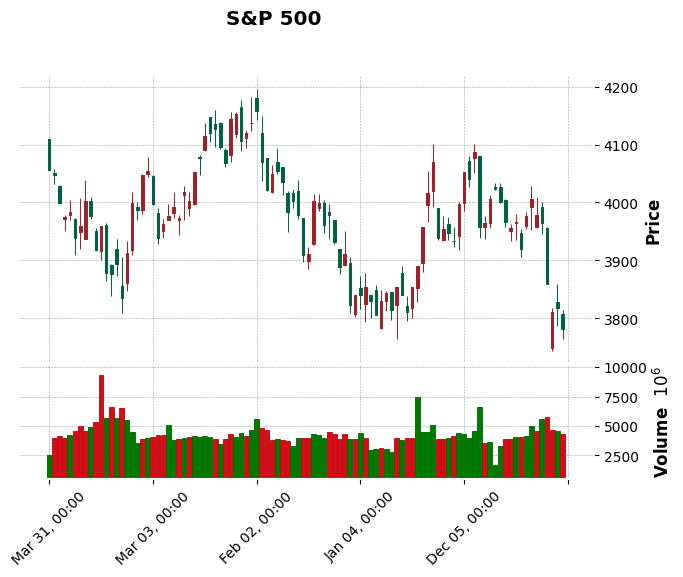

In [ ]:
import mysql.connector
import mplfinance as mpf

import matplotlib.pyplot as plt
import pandas as pd


mydb=mysql.connector.connect(host="eia-scrap.c2xacwacu1dj.us-west-2.rds.amazonaws.com", user="admin",password="EIA2023*",database="sys")
mycursor=mydb.cursor(buffered=True,dictionary=True)

mycursor.execute("SELECT * FROM sys.Price_stock WHERE student=1036946859")

list_price_stock=mycursor.fetchall()
print(list_price_stock)
df=pd.DataFrame(list_price_stock)
df["Date"]=pd.to_datetime(df["Date"],format="%b %d, %Y")
df.set_index("Date",inplace=True)

plt.figure(1)
mpf.plot(df, type="candle", style="charles", volume=True , title="S&P 500")







REGRESSION


Coeficiencte [0.09536741 0.        ]
Origen 13.390977901588
[array([13.3909779,  0.       ]), array([13.48634531,  0.        ]), array([13.58171273,  0.        ]), array([13.67708014,  0.        ]), array([13.77244755,  0.        ]), array([13.86781497,  0.        ]), array([13.96318238,  0.        ]), array([14.05854979,  0.        ]), array([14.15391721,  0.        ]), array([14.24928462,  0.        ]), array([14.34465203,  0.        ]), array([14.44001944,  0.        ]), array([14.53538686,  0.        ]), array([14.63075427,  0.        ]), array([14.72612168,  0.        ]), array([14.8214891,  0.       ]), array([14.91685651,  0.        ]), array([15.01222392,  0.        ]), array([15.10759134,  0.        ]), array([15.20295875,  0.        ]), array([15.29832616,  0.        ]), array([15.39369357,  0.        ]), array([15.48906099,  0.        ]), array([15.5844284,  0.       ]), array([15.67979581,  0.        ]), array([15.77516323,  0.        ]), array([15.87053064,  0.        ]), 

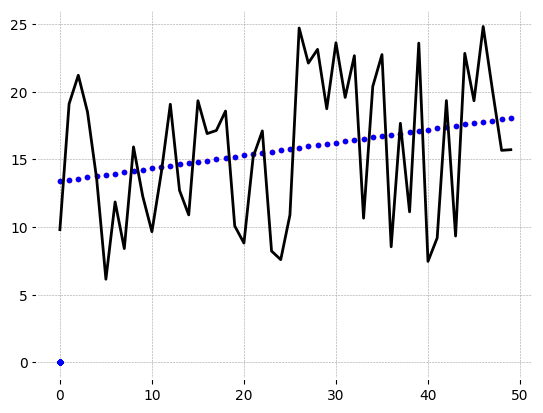

In [ ]:

from sklearn import linear_model
import matplotlib.pyplot as plt

import numpy as np


# Generacion de datos ad_close
n_samples=50

X=np.zeros((n_samples,2))
y=np.zeros((n_samples,2))

X[:,0]=np.array(list(range(n_samples)))
y[:,0]=5+np.random.rand(n_samples)*20

# Implementacion de modelo lineal


linear_regression=linear_model.LinearRegression()
linear_regression.fit(X,y)

# Coeficiente
m=linear_regression.coef_
w=linear_regression.intercept_
print("Coeficiencte",m[0])
print("Origen",w[0])

y_predicted=linear_regression.predict(X)

y_predict_manual=[]
for i in range(len(X)):
  y_predict_manual.append(X[i,0]*m[0] +w)
print(y_predict_manual)


plt.plot(X,y_predicted,"r.")
plt.plot(X,y_predict_manual,"b.")


plt.plot(X,y,"k-")
plt.show()


Segunda practica de modelo lineal


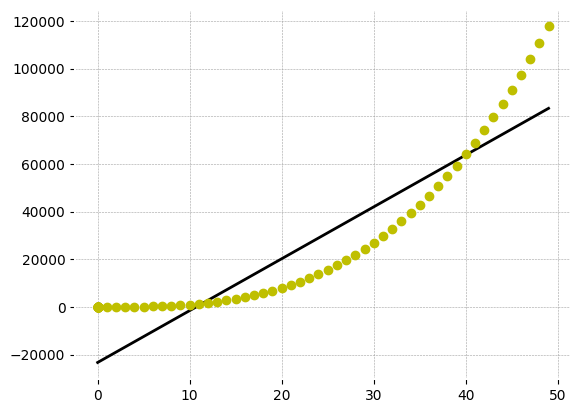

In [ ]:
y[:,0] = X[:,0]**3+np.random.rand(n_samples)*20
linear_regression.fit(X, y) # train the model
y_predicted = linear_regression.predict(X)

plt.plot(X, y_predicted, 'k-')
plt.plot(X, y, 'yo')
plt.show()


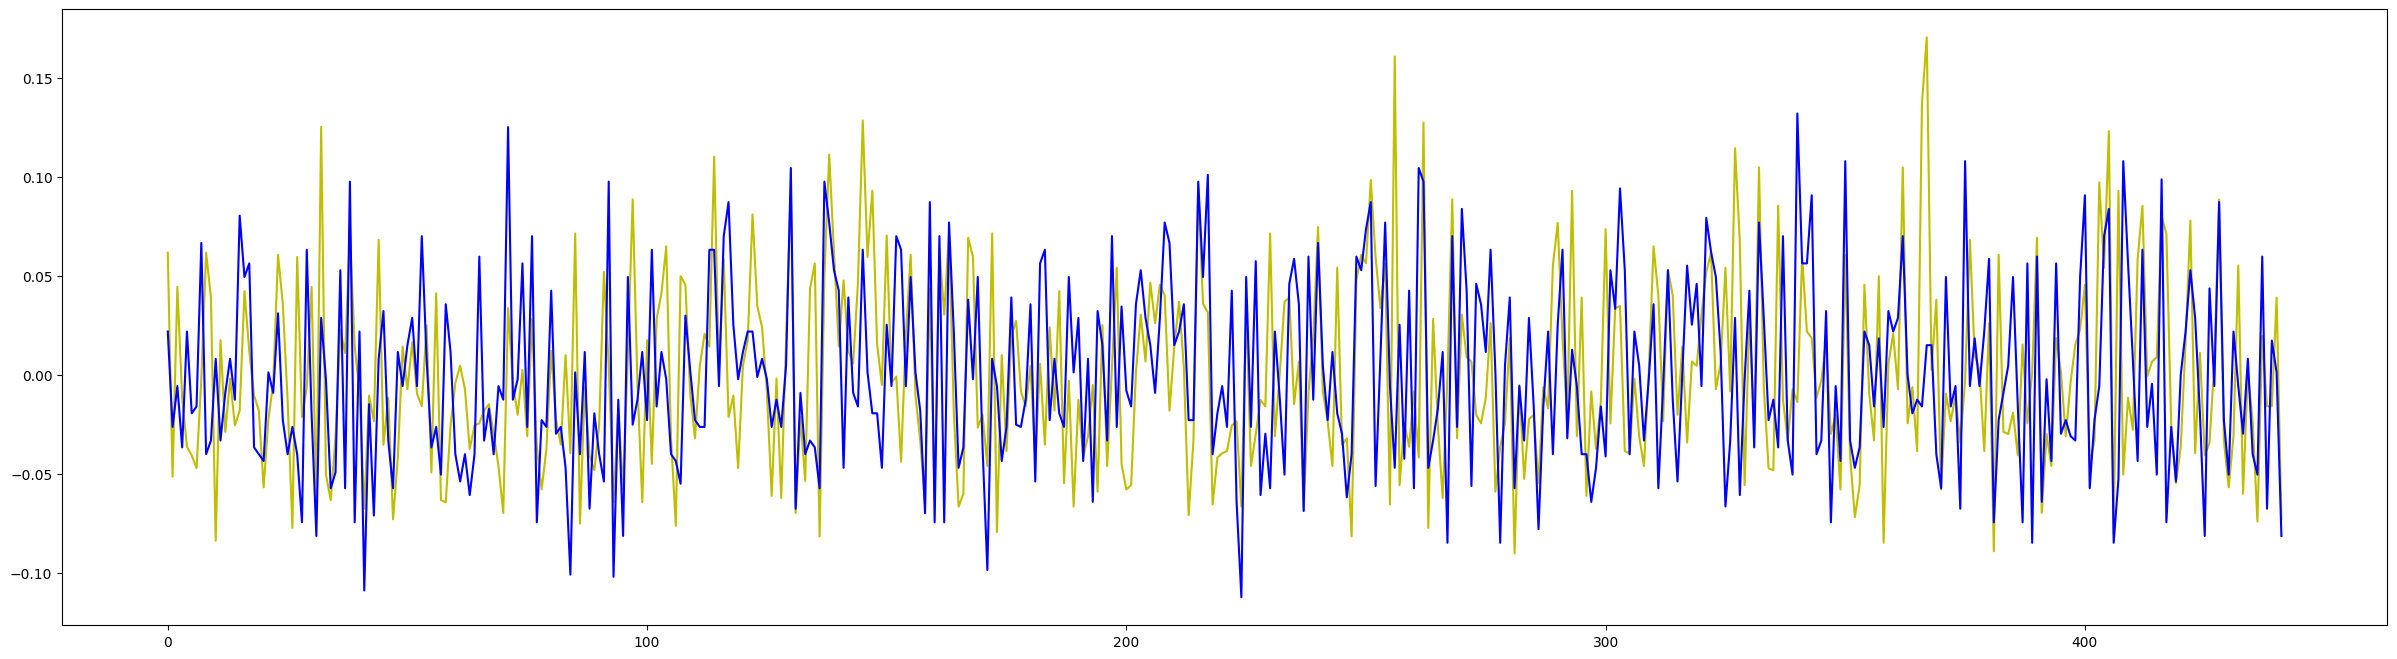

Erors de train 3878.676127518841
Erors de test 3928.05777591204


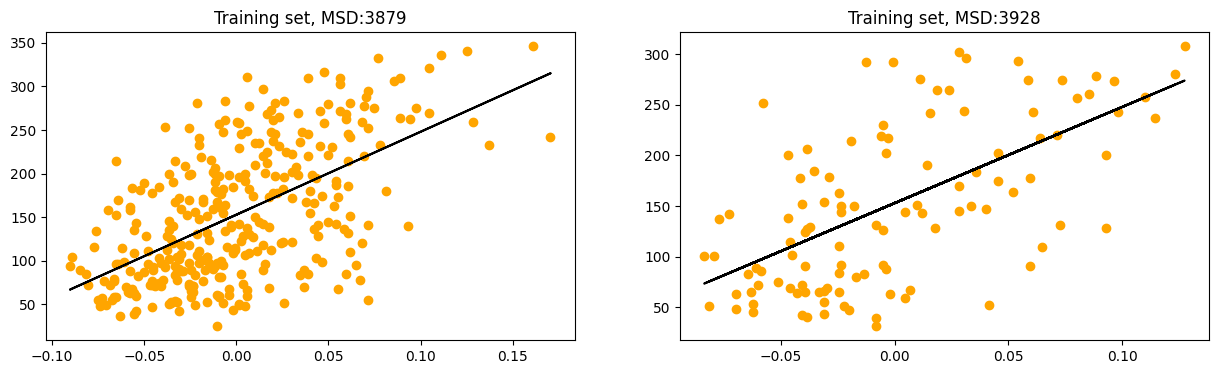

In [ ]:
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np

#class tes_train

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

diabetes=datasets.load_diabetes()

# print(diabetes.DESCR)
X=diabetes.data
y=diabetes.target

plt.figure(figsize=(30,8))
x=range(0,diabetes.data.shape[0],1)

plt.plot(x,X[:,2],"y-",label="MASS INDEX")


plt.plot(x,X[:,3],"b-",label="Blood P")

plt.show()


#Componenetes para la regresion lineal

X=diabetes.data[:,np.newaxis,2]


X_train , X_test ,y_train ,y_test=train_test_split(X,y,random_state=10)


linear_regression=linear_model.LinearRegression()


linear_regression.fit(X_train , y_train)

y_train_predicted=linear_regression.predict(X_train)
y_test_predicted=linear_regression.predict(X_test)

# Error minimo cuadratico al final del aprendizaje
train_MSD=mean_squared_error(y_train,y_train_predicted)
test_MSD=mean_squared_error(y_test,y_test_predicted)

print("Erors de train",train_MSD)
print("Erors de test",test_MSD)

fig, axs=plt.subplots(1,2,figsize=(15,4))



axs[0].scatter(X_train,y_train,color="orange")
axs[0].plot(X_train,y_train_predicted,color="black")
axs[0].set_title('Training set, MSD:{:.0f}'.format(train_MSD))

axs[1].scatter(X_test,y_test,color="orange")
axs[1].plot(X_test,y_test_predicted,color="black")
axs[1].set_title('Training set, MSD:{:.0f}'.format(test_MSD))

plt.show()


















   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(717, 13)
(717,)


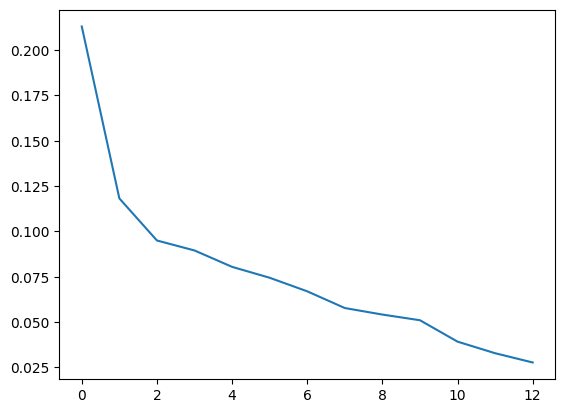

Sore PCA: 0.8668831168831169
Sore IPCA: 0.8344155844155844
MEjores ['oldpeak', 'thalach', 'slope', 'exang', 'age', 'cp', 'ca', 'trestbps', 'thal', 'restecg', 'chol', 'sex', 'fbs']


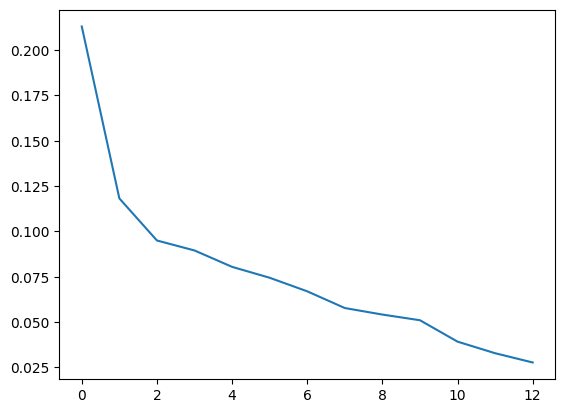

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import IncrementalPCA


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split



df_heart=pd.read_csv("heart.csv")


print(df_heart.head(5))

df_features=df_heart.drop(["target"],axis=1)
df_target=df_heart["target"]


df_features=StandardScaler().fit_transform(df_features)

X_train, X_test ,y_train , y_test=train_test_split(df_features, df_target , test_size=0.3 ,random_state=32)



print(X_train.shape)
print(y_train.shape)

#Reduccion dimensionalidad PCA
pca=PCA(n_components=13)
pca.fit(X_train)

#Reduccion  dimensionalidad IPCA

ipca=IncrementalPCA(n_components=3,batch_size=10)
ipca.fit(X_train)


plt.plot(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)
plt.show()

logistic= LogisticRegression(solver="lbfgs")

dt_train=pca.transform(X_train)
dt_test=pca.transform(X_test)

logistic.fit(dt_train,y_train)

print("Sore PCA:",logistic.score(dt_test,y_test))


dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)

print("Sore IPCA:",logistic.score(dt_test,y_test))


feature_labels = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


pc1_coeffs=pca.components_[0]


top_features = sorted(range(len(pc1_coeffs)), key=lambda i: abs(pc1_coeffs[i]), reverse=True)[:13]



top_features_name=[feature_labels[i] for i in top_features]

print("MEjores",top_features_name)

plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()















In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
dataset=pd.DataFrame(data=data["data"],columns=data["feature_names"])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.model_selection import train_test_split
X=dataset.copy()
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(ccp_alpha=0.01)
clf=clf.fit(X_train,y_train)
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
predictions=clf.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
clf.predict_proba(X_test)

array([[0.01327434, 0.98672566],
       [0.99186992, 0.00813008],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.25      , 0.75      ],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.99186992, 0.00813008],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [1.        , 0.        ],
       [0.99186992, 0.00813008],
       [0.99186992, 0.00813008],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.01327434, 0.98672566],
       [0.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions,labels=[0,1])

from sklearn.metrics import precision_score
precision_score(y_test, predictions)


from sklearn.metrics import recall_score
recall_score(y_test, predictions)


from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))





              precision    recall  f1-score   support

   malignant       0.89      0.91      0.90        70
      benign       0.95      0.93      0.94       118

    accuracy                           0.93       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



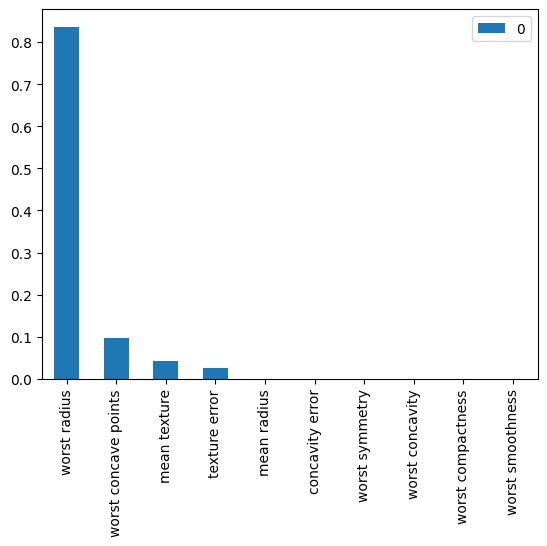

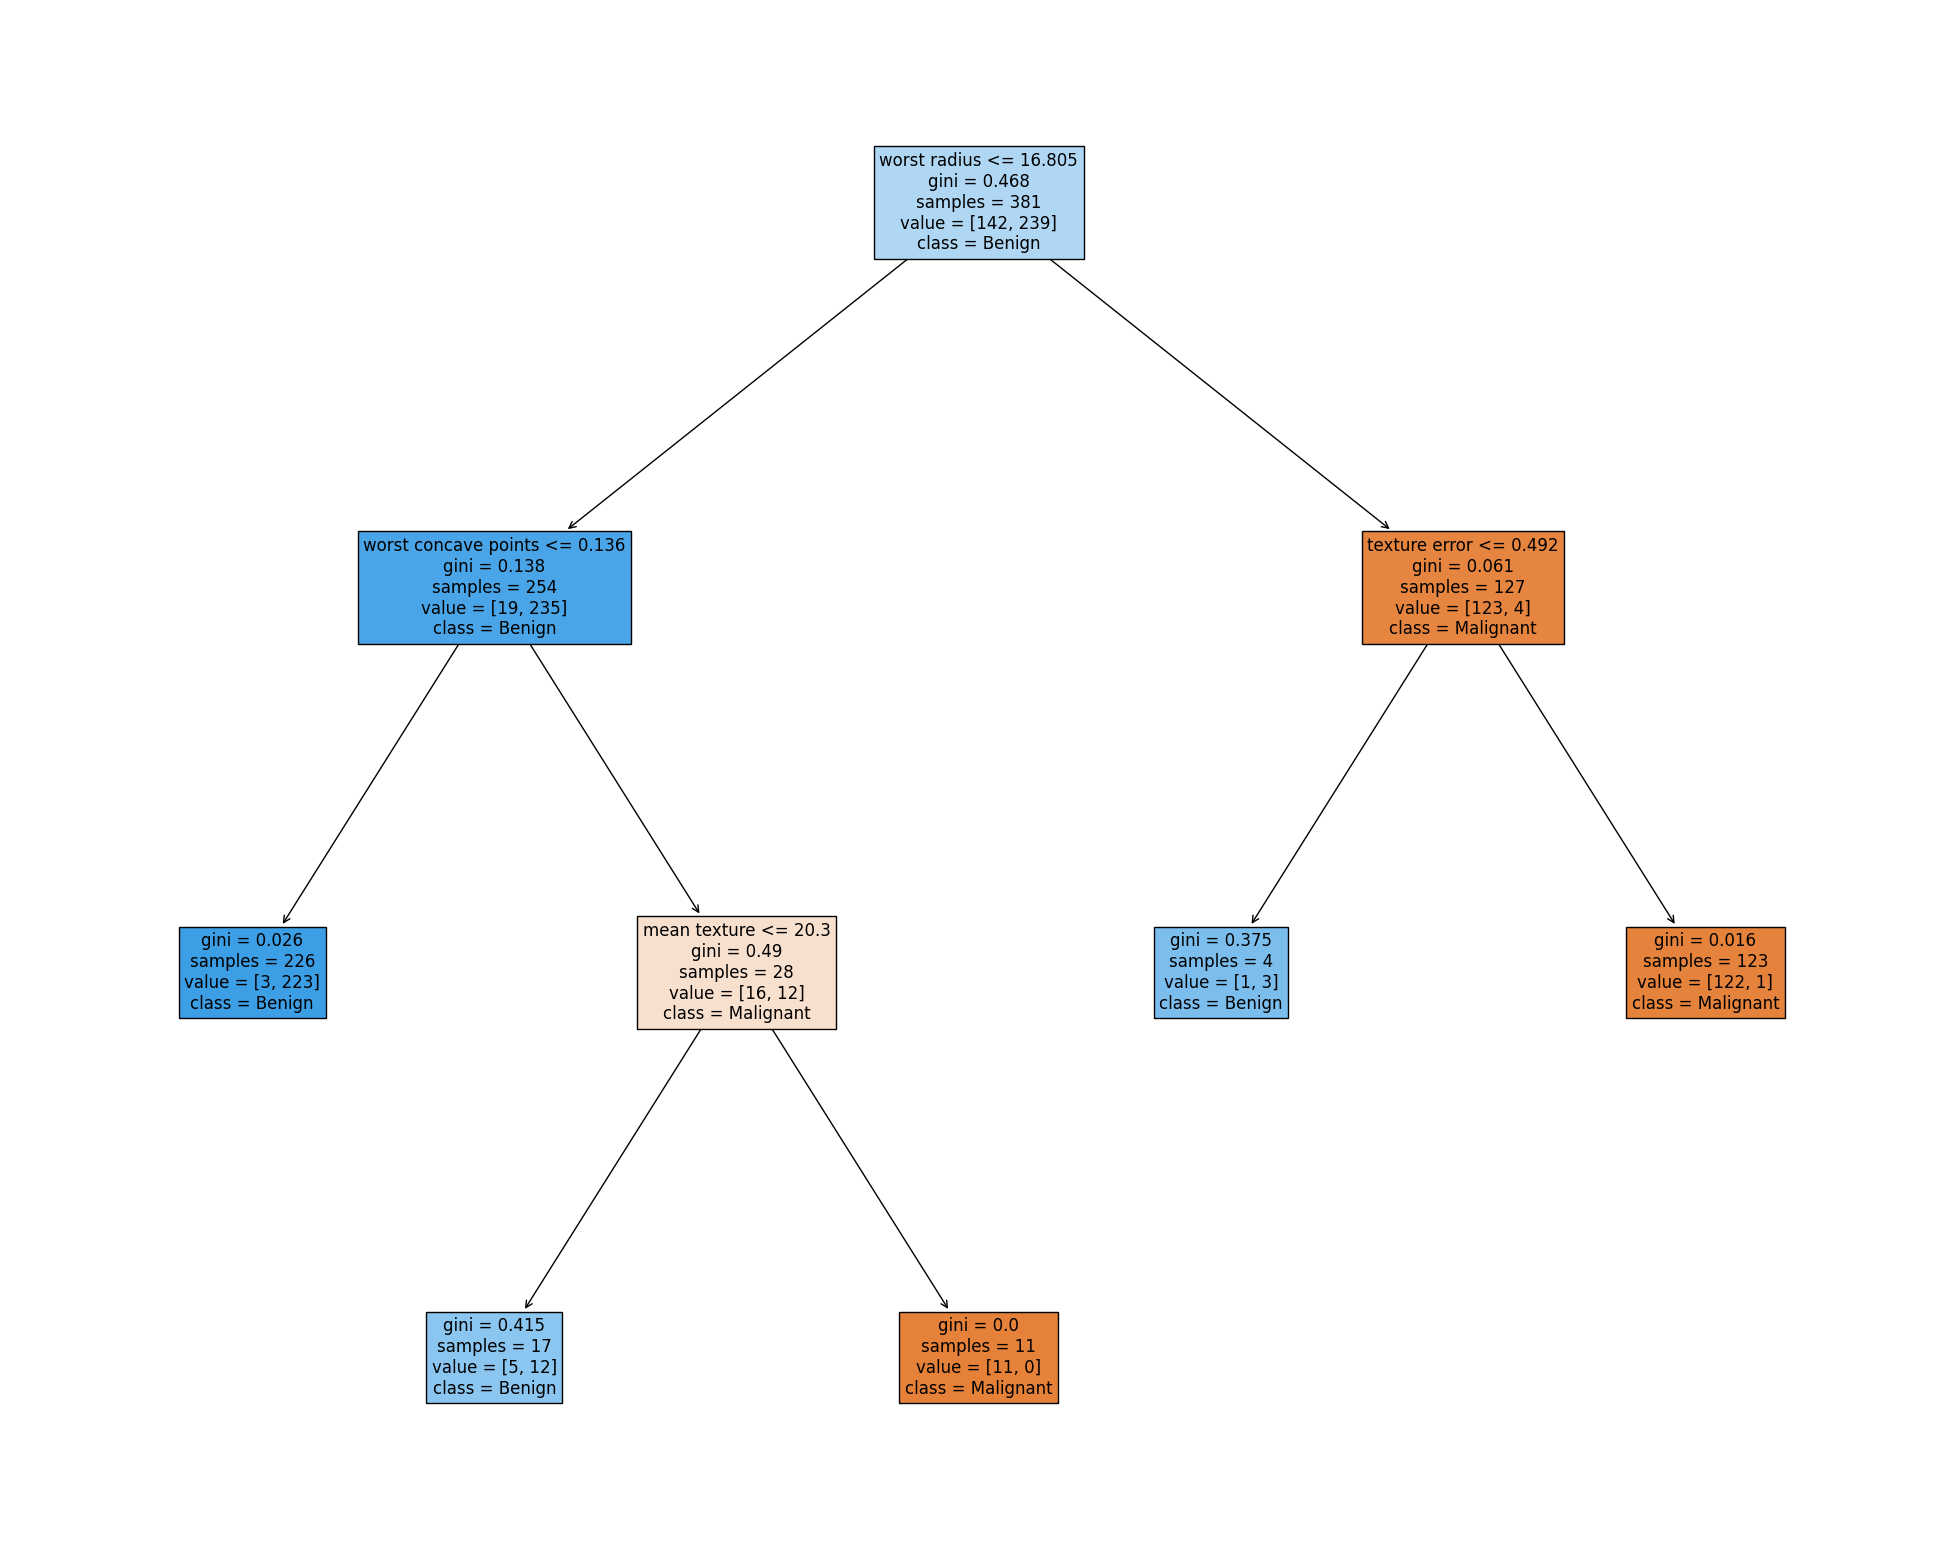

In [ ]:
feature_names=X.columns
feature_names


feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature=list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind="bar")

from sklearn import tree
fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

RAMDOM FOREST


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer


data=pd.read_csv("creditcard.csv")

data.describe()






,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
X=data.drop("Class",axis=1)
y=data["Class"]

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
y_test=y_test.dropna()

imputer= SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed=imputer.fit_transform(X_test)

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,random_state=42)

In [ ]:
rfc.fit(X_train_imputed,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
 y_pred=rfc.predict(X_test_imputed)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Efectivida: ",accuracy)

Efectivida:  0.9995669627705019


**SVM**

In [ ]:
import pandas as pd

import numpy as np

from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

import pickle

import time
import re

import nltk



In [ ]:
train_set=pd.read_csv("Corona_NLP_train.csv",encoding="latin1")
test_set=pd.read_csv("Corona_NLP_test.csv")



In [ ]:
unrelevant=["UserName","ScreenName","Location","TweetAt"]

train_set.drop(unrelevant,inplace=True,axis=1)
test_set.drop(unrelevant,inplace=True,axis=1)
train_set.head()



,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
train_set.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
train_set["Sentiment"].value_counts()

Positive              3233
Negative              3059
Neutral               2143
Extremely Negative    1929
Extremely Positive    1765
Name: Sentiment, dtype: int64

In [ ]:
positives=train_set[(train_set["Sentiment"]=="Positive")|(train_set["Sentiment"]=="Extremely Positive") ]
positves_test=test_set[(test_set["Sentiment"]=="Positive")|(test_set["Sentiment"]=="Extremely Positive") ]

In [ ]:
negatives=train_set[(train_set["Sentiment"]=="Negative")|(train_set["Sentiment"]=="Extremely Negative") ]
negatives_test=test_set[(test_set["Sentiment"]=="Negative")|(test_set["Sentiment"]=="Extremely Negative") ]

In [ ]:
neutrals=train_set[(train_set["Sentiment"]=="Neutral")]
neutrals_test=test_set[test_set["Sentiment"]=="Neutral"]

In [ ]:
import warnings as wrn
wrn.filterwarnings("ignore")
negatives["Sentiment"]=0
negatives_test["Sentiment"]=0

positives["Sentiment"]=2
positves_test["Sentiment"]=2

neutrals["Sentiment"]=1
neutrals_test["Sentiment"]=1

neutrals.head()


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
7,Was at the supermarket today. Didn't buy toile...,1
10,All month there hasn't been crowding in the su...,1
16,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,1
17,@eyeonthearctic 16MAR20 Russia consumer survei...,1


In [ ]:
data=pd.concat([positives,positves_test,neutrals,neutrals_test,negatives,negatives_test ] ,axis=0)

In [ ]:
data.info()
data.reset_index(inplace=True)

import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["OriginalTweet"][random_ind]),end="\nLabel: ")
    print(str(data["Sentiment"][random_ind]),end="\n\n")




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15927 entries, 0 to 15926
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          15927 non-null  int64 
 1   OriginalTweet  15927 non-null  object
 2   Sentiment      15927 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 373.4+ KB
I havenÂt seen this big queues in grocery section of Bhat Bhateni Supermarket in Thimi since it opened! Not even in #Dashain festival! #coronavirus
Label: 0

So, are we feeling like it's ethical to still do stuff like order deliveries (food, online shopping, etc.), ship "isolation" care packages to loved ones, etc.? #COVID2019
Label: 2

Can you find Purell? I can't. An @astoundcommerce survey shows ~50% of shoppers have been impacted by out-of-stocks. #trending #consumerdata #consumerbehavior https://t.co/7zpDCGqYUS
Label: 1


https://t.co/2rwMiAP25w
Label: 2

Spent my first self-quarantine day at home; cleaning al

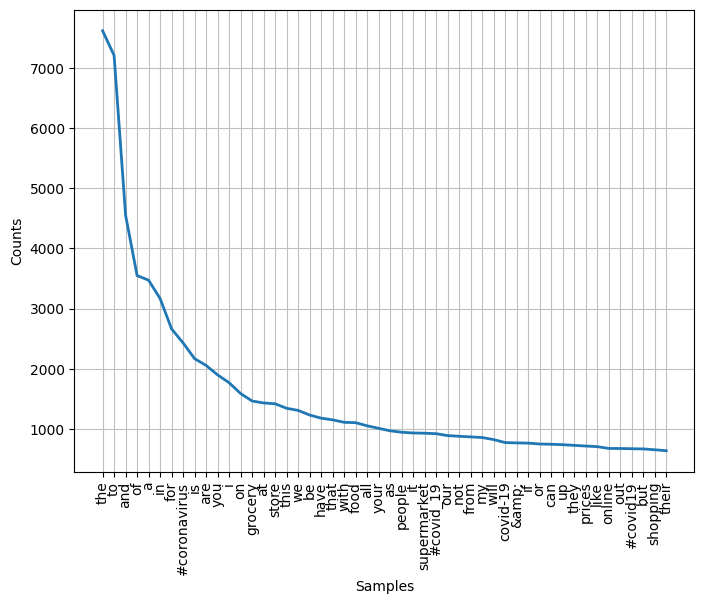

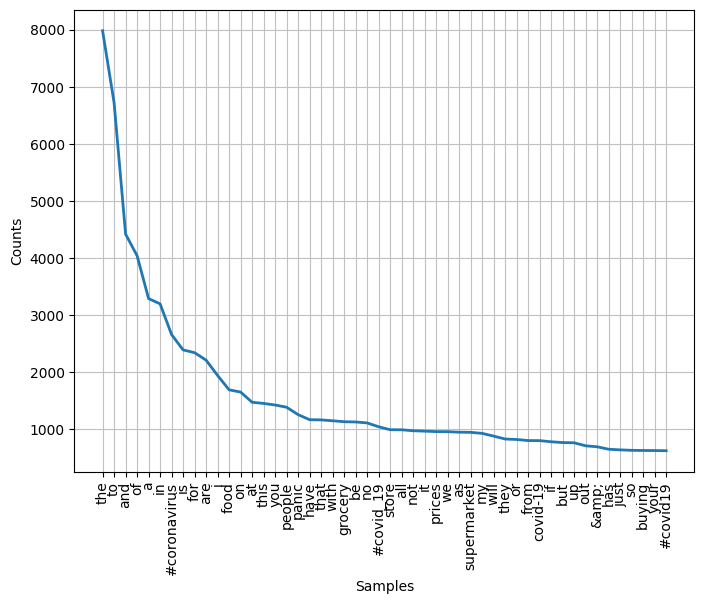

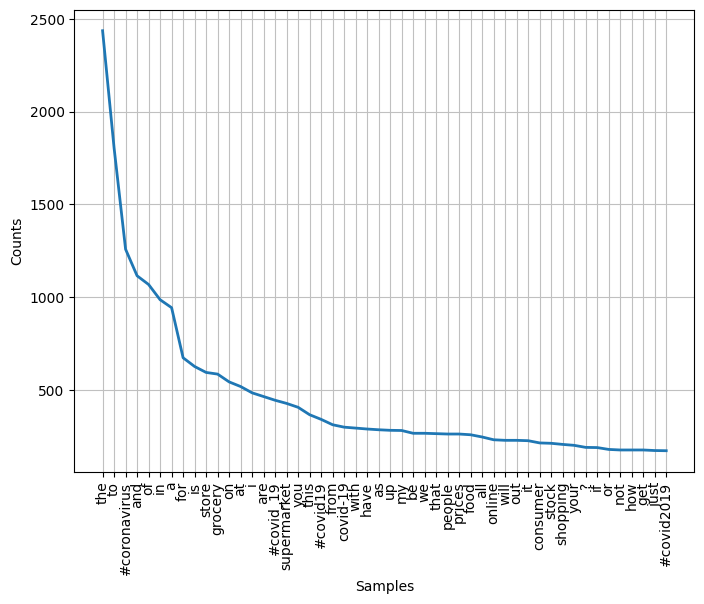

In [ ]:
postiviefD=nltk.FreqDist(word for text in data[data["Sentiment"]==2]["OriginalTweet"]for word in text.lower().split())
plt.subplots(figsize=(8,6))
postiviefD.plot(50)
plt.show()

negativefD=nltk.FreqDist(word for text in data[data["Sentiment"]==0]["OriginalTweet"]for word in text.lower().split())
plt.subplots(figsize=(8,6))
negativefD.plot(50)
plt.show()

neutrlafD=nltk.FreqDist(word for text in data[data["Sentiment"]==1]["OriginalTweet"]for word in text.lower().split())
plt.subplots(figsize=(8,6))
neutrlafD.plot(50)
plt.show()


In [ ]:
cleanData=[]
lemma= WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
swords=stopwords.words("english")

for text in data["OriginalTweet"]:
  # link clean
  text=re.sub(r'http\S+', '', text)
  # especial carachter
  text=re.sub("[^a-zA-Z0-9]"," ",text)

  text=nltk.word_tokenize(text.lower())
  text=[lemma.lemmatize(word) for word in text]

  text=[word for word in text if word not in swords]


  text=" ".join(text)
  cleanData.append(text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
for i in range(0,5):
    print(cleanData[i],end="\n\n")

advice talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist gp set online shopping account po adequate supply regular med order

coronavirus australia woolworth give elderly disabled dedicated shopping hour amid covid 19 outbreak

food stock one empty please panic enough food everyone take need stay calm stay safe covid19france covid 19 covid19 coronavirus confinement confinementotal confinementgeneral

news region first confirmed covid 19 case came sullivan county last week people flocked area store purchase cleaning supply hand sanitizer food toilet paper good tim dodson report

cashier grocery store wa sharing insight covid 19 prove credibility commented civics class know talking



In [ ]:
vectorizer=CountVectorizer(max_features=1000)
BOW=vectorizer.fit_transform(cleanData)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(BOW,np.asarray(data["Sentiment"]))

from sklearn.svm import SVC
start_time=time.time()

model=SVC()
model.fit(x_train,y_train)
end_time=time.time()





In [ ]:
predictions=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Acurracy:"+ str(accuracy_score(y_test,predictions)*100))

Acurracy:69.68859869412356
